Setting up a fancy stylesheet

In [1]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

Setting up the required python &#8482; environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
#from scipy import mean
#from scipy.stats import chi2_contingency, ranksums, bayes_mvs, ttest_ind, ranksums
#import scikits.bootstrap as bs

%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('paper', font_scale = 2.0, rc = {'lines.linewidth': 1.5, 'figure.figsize' : (10, 8)})
filterwarnings('ignore')

# Measures of central tendency and dispersion

## Introduction

In this notebook we will take a look at the most common statistical tools<br>
* Measures of central tendency
    - Mean (average)
    - Median
    - Mode
* Measures of dispersion
    - Range (minimum and maximum
    - Standard deviation
    - Variance
    - Quantiles and percentiles

## Importing our data

In [3]:
data = pd.read_csv('MOOC_Mock.csv')

## Measures of central tendency

The various forms of central tendency are methods that try to represent a group of values with a single value, representative of the whole group.  In order for such a number to be representative, it must reflect some tendency in that group.  For the three methods here, namely, mean, median, and mode, the attempt is to represent some central value in the group. 

### Mean

The *mean* value of a group of values, or the *average* value, is a very simple concept and can easily be calculated by adding all the values in the group and dividing that sum by the number of values in the group. 

It is child’s play to consider the mean of four and six, since four plus six is ten and dividing ten by two (since the group consists of two values), is five.

The mean is an excellent way to represent all your data point for a single variable in one single value.  In this regard it is most useful when the variable is a ratio type numerical variable.  Example would be mean white cell count, systolic blood pressure, age, and many, many more.

### Median

*Median* is another way to represent central tendency and it searches for a value for which half of the numbers are smaller than and the other half are larger than the calculated value.

The immediate question that arises is: "That's fine for an odd number of values, but what happens if there are an even number of values?".  That's easy to fix.  Simply takes the average of the middle two values.  Here is an example:

Values:  *9, 11, 12, 13, 14, 16*.  There are six values.  Clearly the middle two would be *12* and *13*.  Their mean being *12.5*.  The median would be *12.5*, since half of the values are less than *12.5* in value and half are more than *12.5* in value.

There are two common uses for median as opposed to mean:
* If some of your data points are out of keeping with the rest.  Say you have values of *10, 11, 9, 14, , 9, 10, 30, 43*.  Clearly the values of *30*, and *43* are way outside of the rest.  Calculating amean would be a misrepresentation of the data if you think about it.
* The second use is more subtle.  Imagine calculating the Modified Alvarado Score (MAS) for patients with suspected appendicitis.  These data points are integers and do not represent continuous variables.  Would it be correct to represent all the MAS-values as a mean.  That woudl seem ever so slightly odd.  *Median* would be much better here.  We are dealing with ordinal categorical data points after all.

### Mode

The last form of central tendency is the *mode*.  In medical statistics it is most often used for non-numeric values, such as disease names.

It simply represent the value that appears most in a data set.

## Measures of dispersion

Now that we can represent our set of data point for a variable as a single value, the next step is to give some indication of the spread of data.

In this sense, data values can bunch up close to the average, or values can be further distributed.  In a simple example, both the sets of three values *9, 10, 11* and *2, 10, 18* have the same mean *10*, but the data values are much further spread in the second set.

### Range

The range is the simplest way to describe the spread in the data and merely refers to the smallest and largest values in data set.  With these values stated, the range is the largest value minus the smallest value.

It is quite useful when describing the age of your sample population.

### Variance and standard deviation

The method of expressing how large a dispersion or spread is, is referred to as the *variance*, or by the square root of the variance, called the *standard deviation*.

It should be clear that the standard deviation is merely the square root of the variance.  It is simpler to explain the standard deviation.  Imagine all the data values in a data set are represented by dots on a straight line, i.e. the familiar x-axis from graphs at school.  A dot can also be placed on this line representing the mean value.  Now the distance between each point and the mean is taken and then averaged, so as to get an average distance for how far all the points are from the mean.

It is vitally important to have the following concepts well and truly understood.  Some values will be below (lower) than the mean and some will be above (higher) than the mean.  The standard deviation represents the average distance all the lower points are away from the mean and the average distance all the higher points are away, by a single value!

Quick note: the equations for population and sample standard deviation are slightly different.

Here is a quick look at what we have described up until now:

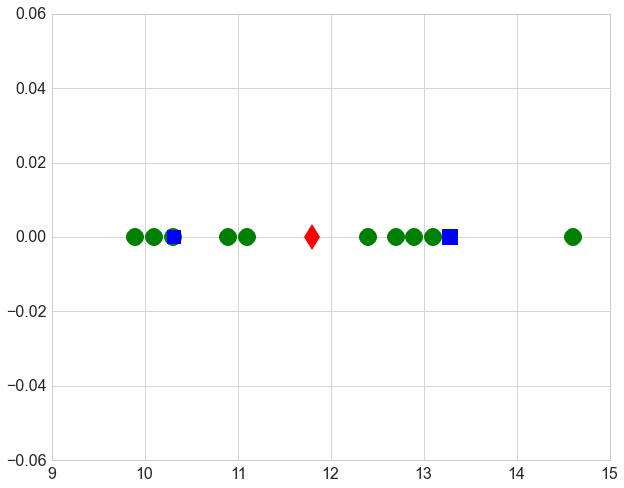

In [4]:
WCC = [10.1, 12.4, 13.1, 14.6, 9.9, 10.3, 11.1, 12.9, 10.9, 12.7]
y = 10 * [0]

meanWCC = np.mean(WCC)
stdWCC = np.std(WCC)

plt.figure()
plt.plot(WCC, y, 'go', markersize = 18)
plt.plot(meanWCC, 0, 'rd', markersize = 18)
plt.plot(meanWCC - stdWCC, 0, 'bs', markersize = 14)
plt.plot(meanWCC + stdWCC, 0, 'bs', markersize = 16)
#plt.plot(np.median(WCC), 0, 'bd')
plt.show();

### Quartiles and percentiles

Another form of grouping relates to *quartiles* and *percentiles*.  As the name suggest, *quartiles* divide the group of values into four equal quarters and it is possible to calculate what values in the group represents these cut-offs.  These watershed values are named zero to four.  The zeroth value is the same as the minimum value and the fourth quartile value is the same as the maximum value.  The first quartile represent the upper edge of the bottom quarter of values.  It simply builds from here.  The second quartile value represents to upper edge of the second from bottom quarter of values.  Note, though, that two quarters make a half, and as would be suspected, the second quartile value would be the top edge of the bottom half of all the values, in other words, the *median*.  The third quartile value, would then represent the upper mark of the next quarter set of values, or actually the median of only the top half of all the values.

Analogous to the quartile functions are the *percentile* functions.  They return a value from the group of values based on an argument given to the function.  This argument can range from zero to one, representing 0% up to 100%.  This argument divides the group of values into what is in effect 100 equal groups.  It is important to note that this encompasses the quartile values, as, for instance, the first quartile would be the 0.25th percentile.

## Calculating some measure of central tendency and dispersion

In [5]:
data.head(3) #Looking at the header columns and first 3 rows (default = 5)

,File,Age,Gender,Delay,Stay,ICU,RVD,CD4,HR,Temp,CRP,WCC,HB,Rupture,Histo,Comp,MASS
0,1,38,Female,3,6,No,No,NaN,97,35.2,NaN,10.49,10.4,No,Yes,Yes,5
1,2,32,Male,6,10,No,Yes,57,109,38.8,45.3,7.08,19.8,No,No,Yes,8
2,3,19,Female,1,16,No,No,NaN,120,36.3,10.7,13.00,8.7,No,No,No,3


### Using the *.describe* function

Identifying a column and adding the *.describe* function is a quick way to get a glimpse at our data.

In [6]:
data['Age'].describe() #Identifying the Age column and calling the describe function lists the following

count    150.000000
mean      30.733333
std       10.920498
min       18.000000
25%       22.000000
50%       28.000000
75%       35.000000
max       67.000000
Name: Age, dtype: float64

We note that there are a *150* data points in the **Age** columns, with amean of *20.9* years.  The *std* stands for standard deviation, the *min* for the minimum value and the *max* for the maximum value.

The percentages are the quartiles, wthe the 50% marked being the *median*.

We could now report that the mean age of our sample group was 20.9 years with a range from 4 to 64 years.

In [7]:
data['Delay'].describe()

count    150.000000
mean       3.206667
std        2.241454
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: Delay, dtype: float64

In [8]:
data['Stay'].describe()

count    150.000000
mean      10.886667
std        5.413799
min        2.000000
25%        6.000000
50%       11.000000
75%       15.000000
max       21.000000
Name: Stay, dtype: float64